#**Big Data Colab Week 6: End to End Regression**

Back into the code! This week, we'll use a combination of the programming skills from the earlier weeks along with the past lectures to create an end to end machine learning example. We'll go from downloading the data to making and validating predictions

## Workflow


1.   Understand the problem
2.   Get the data
3.   Explore the data
4.   Visualize the data
5.   Prepare the data
6.   Pick a model
7.   Evaluate
8.   Present



In [10]:
import pandas as pd # Dataframes and series
from matplotlib import pyplot as plt # Plotting
from sklearn import datasets # ML Library full of models
import numpy as np # Fast list operations

## 1. Understand the problem

Welcome to the MAGIC Housing Corp. Your first task is to use California Census data to build a model predicting housing prices in the state. The data includes various metrics (population, income, median housing price, ...) for each block group in CA. Block groups are the smallest geographical unit for which the census publishes sample data.

Your model must predict a district's median housing price.

## 2. Get the Data / Setup Environment

In [11]:
import pandas as pd # Dataframes and Series
import numpy as np # List operations
import matplotlib.pyplot as plt # Plotting


housing_df = pd.read_csv("https://storage.googleapis.com/mledu-datasets/california_housing_train.csv", sep=",")

from sklearn.datasets import load_iris
iris = load_iris()
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])


## 3. Explore Data
In order to understand how our model is working, we have to understand the dataset. Do you remember some of the operations we can try to get a feel for our data?

In [ ]:
#### Take a look at the first rows #######

**Value?** What are the features? Numeric or categorical?

In [ ]:
#### See general info of dataset ########

**Value?** How many values do we have? How many columns?

In [ ]:
#### Check to see if we're missing any data ######


**Value?** ML algos can't handle missing data.

In [ ]:
#### Calculate point statistics (describe???) for the dataset ######

In [ ]:
#### Visualize distribution for each features as histograms #####

**Value?** What is the distribution of the features?

**Things to notice ...**
1.   Scaling for median_income
2.   housing_median_age capped?
3.   Attributes have very different scales.



## 4. Visualize data and correlations

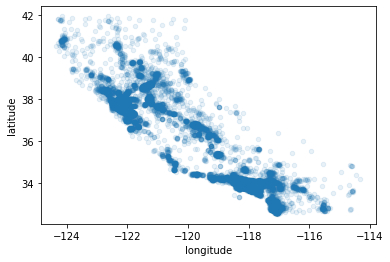

In [14]:
housing_df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

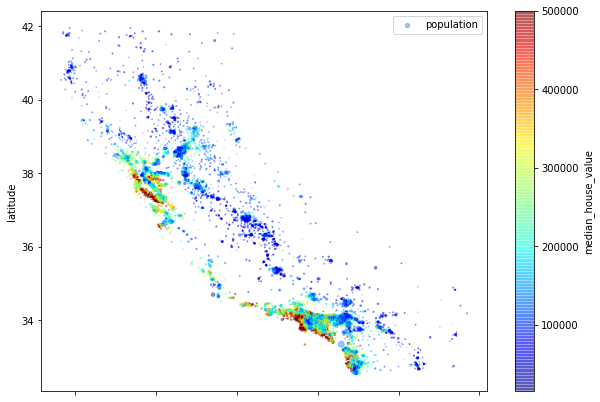

In [48]:
housing_df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
                s=housing_df["population"]/1000, label="population", figsize=(10,7),
                c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)


**What does this tell us?**

In [ ]:
# Correlation Matrix
iris_corr_matrix = iris_df.corr()
iris_corr_matrix
iris_corr_matrix['target']

In [ ]:
from pandas.plotting import scatter_matrix

scatter_matrix(iris_df, figsize=(12,8))

In [53]:
## Build a scatter matrix for housing here for median_house_value, 
## median_income, total_rooms, housing_median_age 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925208,-0.114250,0.047010,0.071802,0.101674,0.059628,-0.015485,-0.044982
latitude,-0.925208,1.000000,0.016454,-0.038773,-0.069373,-0.111261,-0.074902,-0.080303,-0.144917
housing_median_age,-0.114250,0.016454,1.000000,-0.360984,-0.320434,-0.295890,-0.302754,-0.115932,0.106758
total_rooms,0.047010,-0.038773,-0.360984,1.000000,0.928403,0.860170,0.919018,0.195383,0.130991
total_bedrooms,0.071802,-0.069373,-0.320434,0.928403,1.000000,0.881169,0.980920,-0.013495,0.045783
population,0.101674,-0.111261,-0.295890,0.860170,0.881169,1.000000,0.909247,-0.000638,-0.027850
households,0.059628,-0.074902,-0.302754,0.919018,0.980920,0.909247,1.000000,0.007644,0.061031
median_income,-0.015485,-0.080303,-0.115932,0.195383,-0.013495,-0.000638,0.007644,1.000000,0.691871
median_house_value,-0.044982,-0.144917,0.106758,0.130991,0.045783,-0.027850,0.061031,0.691871,1.000000


## 4. Create training and test sets

We want to be able to evaluate our model and "fake" real world data. Sklearn provides a function to split our dataset up into two sets, one for testing and another for training.

test_size: proportion of the dataset that should be in the test set
random_state: makes sure you get the same sets each time you run it



In [85]:
from sklearn.model_selection import train_test_split

iris_train, iris_test = train_test_split(iris_df, test_size=0.2, random_state=42)

## 5. Prepare Data for Model (Feature Scaling)

The scales of the features vary drastically. If we change the weights of all the features by 1, its going to affect some way more than others.

The Standard Scaler scales down the range of all features to be between -1 and 1 with the mean at 0. 

In [91]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
iris_features_train = iris_train.drop(['target'], axis=1)
iris_features_train.head()

scaled_iris_features_train = scaler.fit_transform(iris_features_train)

In [ ]:
### Scale down all features of the housing_df test set here.

## 6. Select and Train Model

In [92]:
from sklearn.linear_model import SGDRegressor

lin_reg = SGDRegressor(eta0=(0.01), max_iter=10000)
lin_reg.fit(scaled_iris_features_train, iris_train['target'])

print("Predictions: ", lin_reg.predict(scaled_iris_features_train[:5]))
print("Actual Values: ", iris_train["target"][:5])


Predictions:  [-0.22098592 -0.08840147  1.28925782 -0.04920673 -0.1040756 ]
Actual Values:  22    0.0
15    0.0
65    1.0
11    0.0
42    0.0
Name: target, dtype: float64


In [93]:
from sklearn.metrics import mean_squared_error
preds = lin_reg.predict(scaled_iris_features_train)

mse = mean_squared_error(preds, iris_train["target"])
np.sqrt(mse)

0.23982819913154396

Can we get better by tuning hyperparameters? What should we make them?

Lets search!

Sklearn's gridsearch allows you specify different values for the hyperparameters you want to try. When you train the model, it'll train many times using each combination of parameters.




In [94]:
from sklearn.model_selection import GridSearchCV

param_grid = [
            {'eta0': [1,0.01,0.001,0.0001], 'max_iter': [100,1000,10000]}
]
lin_reg = SGDRegressor()

grid_search = GridSearchCV(lin_reg, param_grid)

grid_search.fit(scaled_iris_features_train, iris_train['target'])
print("BEST ESTIMATOR")
grid_search.best_estimator_

BEST ESTIMATOR


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linea

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=100,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

## 7. Test on test set

Now we want to see how well our model generalizes to new data.

In [106]:
iris_features_test = iris_test.drop(['target'], axis=1)

scaled_iris_features_test = scaler.fit_transform(iris_features_test)

lin_reg = SGDRegressor(eta0=(0.01), max_iter=10000)
lin_reg.fit(scaled_iris_features_test, iris_test['target'])

print("Predictions: ", lin_reg.predict(scaled_iris_features_test[:5]))
print("Actual Values: ", iris_test["target"][:5])


Predictions:  [1.0919364  0.04932578 2.28194537 1.15655419 1.35086509]
Actual Values:  73     1.0
18     0.0
118    2.0
78     1.0
76     1.0
Name: target, dtype: float64


In [108]:
preds = lin_reg.predict(scaled_iris_features_test)
mse = mean_squared_error(preds, iris_test["target"])
np.sqrt(mse)

0.2361282997649308